# Polinomial Models

In [2]:
# Import libraries

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
# Sample dataset
data = {
    'Study_Hours': [1, 2, 3, 4, 5, 6],
    'Exam_Score': [50, 65, 75, 80, 85, 88]
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

In [5]:
# Extract the features (Study_Hours) and target (Exam_Score)
X = df[['Study_Hours']]  # Feature matrix
y = df['Exam_Score']     # Target vector


In [6]:
# Fit linear regression for comparison
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)
y_pred_linear = linear_regressor.predict(X)

# Fit polynomial regression
poly_features = PolynomialFeatures(degree=2)  # Using a polynomial of degree 2
X_poly = poly_features.fit_transform(X)
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, y)
y_pred_poly = poly_regressor.predict(X_poly)



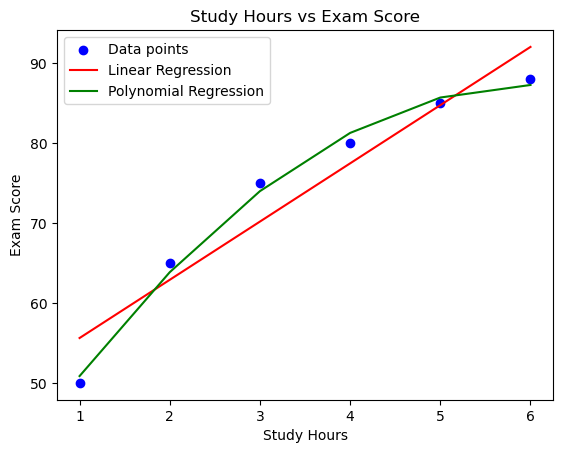

Mean Squared Error (Linear Regression): 13.650793650793647
Mean Squared Error (Polynomial Regression): 0.9523809523809458


In [7]:
# Plot results
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred_linear, color='red', label='Linear Regression')
plt.plot(X, y_pred_poly, color='green', label='Polynomial Regression')
plt.title('Study Hours vs Exam Score')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.legend()
plt.show()

# Evaluate the models
mse_linear = mean_squared_error(y, y_pred_linear)
mse_poly = mean_squared_error(y, y_pred_poly)
print(f'Mean Squared Error (Linear Regression): {mse_linear}')
print(f'Mean Squared Error (Polynomial Regression): {mse_poly}')

# Exponential regression

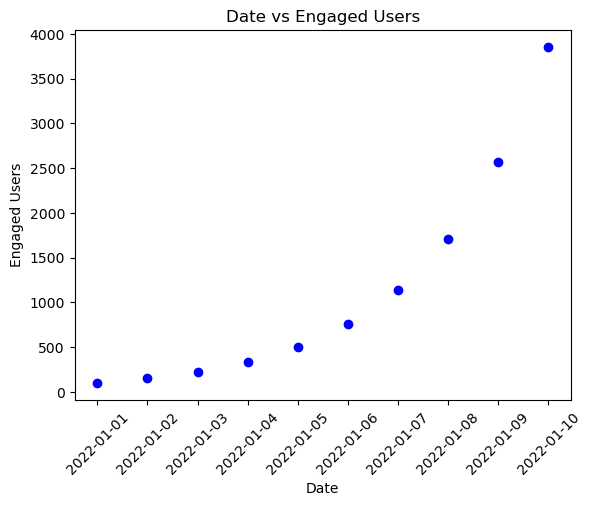

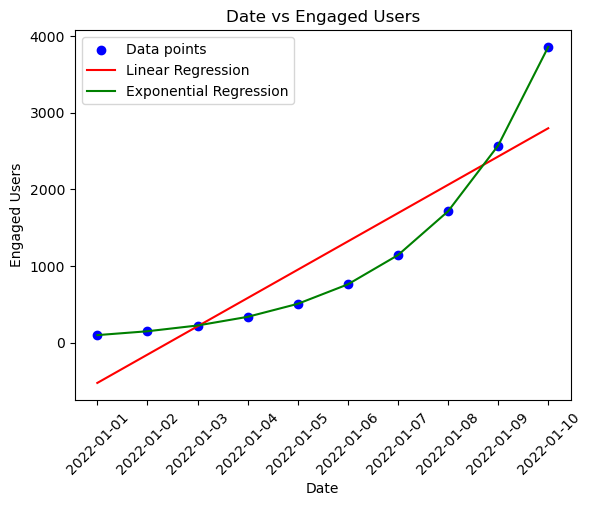

Mean Squared Error (Linear Regression): 261371.2533333334
Mean Squared Error (Exponential Regression): 0.016733976058007534


In [10]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Sample dataset
data = {
    'Date': pd.date_range(start='2022-01-01', periods=10),
    'Engaged_Users': [100, 150, 225, 338, 507, 761, 1142, 1713, 2570, 3855]
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Extract the features (Date) and target (Engaged_Users)
X = np.arange(len(df)).reshape(-1, 1)  # Convert dates to numerical index for linear regression
y = df['Engaged_Users']

# Visualize the data
plt.scatter(df['Date'], y, color='blue', label='Data points')
plt.title('Date vs Engaged Users')
plt.xlabel('Date')
plt.ylabel('Engaged Users')
plt.xticks(rotation=45)
plt.show()

# Fit linear regression for comparison
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)
y_pred_linear = linear_regressor.predict(X)

# Fit exponential regression without using log transformation
def exponential_model(x, a, b, c):
    return a * np.exp(b * x) + c

# Estimate the parameters of the exponential model
params, _ = curve_fit(exponential_model, np.arange(len(df)), y)

# Use the estimated parameters to predict
y_pred_exp = exponential_model(np.arange(len(df)), *params)

# Visualize the models
plt.scatter(df['Date'], y, color='blue', label='Data points')
plt.plot(df['Date'], y_pred_linear, color='red', label='Linear Regression')
plt.plot(df['Date'], y_pred_exp, color='green', label='Exponential Regression')
plt.title('Date vs Engaged Users')
plt.xlabel('Date')
plt.ylabel('Engaged Users')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Evaluate the models
mse_linear = mean_squared_error(y, y_pred_linear)
mse_exp = mean_squared_error(y, y_pred_exp)
print(f'Mean Squared Error (Linear Regression): {mse_linear}')
print(f'Mean Squared Error (Exponential Regression): {mse_exp}')


# Power models

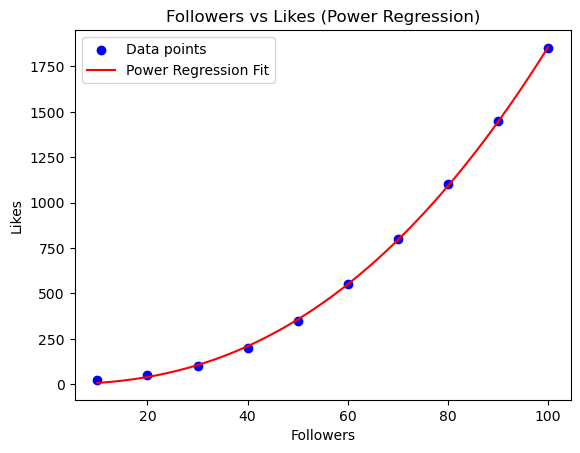

In [11]:
# Import libraries
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Create a DataFrame with the sample data
data = {
    'User_ID': range(1, 11),
    'Followers': np.arange(10, 110, 10),
    'Likes': [25, 50, 100, 200, 350, 550, 800, 1100, 1450, 1850],
    'Shares': [5, 10, 20, 40, 70, 110, 160, 220, 290, 370],
    'Comments': [2, 4, 8, 16, 28, 44, 64, 88, 116, 148]
}
df = pd.DataFrame(data)

# Perform power regression for Likes as an example
# Define the power function: Likes = a * (Followers^b)
def power_function(x, a, b):
    return a * np.power(x, b)

# Fit the power regression model to the Followers and Likes data
params, _ = curve_fit(power_function, df['Followers'], df['Likes'])

# Generate a range of Followers values for the fitted curve
followers_range = np.linspace(df['Followers'].min(), df['Followers'].max(), 100)

# Calculate the predicted Likes using the fitted parameters
predicted_likes = power_function(followers_range, *params)

# Create a plot to visualize the relationship
plt.scatter(df['Followers'], df['Likes'], color='blue', label='Data points')
plt.plot(followers_range, predicted_likes, color='red', label='Power Regression Fit')
plt.title('Followers vs Likes (Power Regression)')
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.legend()
plt.show()
